In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
#讀取cifar10資料
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#顯示訓練與驗證資料的shape
print("train data:",'images:',x_img_train.shape,"labels:",y_label_train.shape)
print("test data:",'images:',x_img_test.shape,"labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [4]:
#將feature標準化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#label以Onehot encoding轉換
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
#匯入模組
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [7]:
#建立模型
model = Sequential()

In [8]:
model.add(Conv2D(
    filters = 32,          #隨機產生32個濾鏡filter weight
    kernel_size = (3,3),   #濾鏡大小3*3
    input_shape =(32,32,3),#第1、2維度:影像大小 第3維度:代表RGB三原色
    activation = 'relu',   #設定ReLU激活函數
    padding = 'same'))     #設定讓卷積運算，產生的卷積影像大小不變

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
#建立池化層
model.add(MaxPooling2D(pool_size=(2,2))) 
#輸入參數pool_size=(2,2)，執行第1次縮減取樣，將32*32影像，所小為16*16的影像，縮減取樣不會改變數量。

In [11]:
#建立卷積層2
model.add(Conv2D(
    filters = 64,        ##隨機產生64個濾鏡filter weight
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same'    
))

In [12]:
model.add(Dropout(0.25))

In [13]:
#建立池化層2
model.add(MaxPooling2D(pool_size=(2,2))) 

In [14]:
#建立平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
#建立隱藏層
model.add(Dense(1024,activation='relu')) #共1024個神經元
model.add(Dropout(rate=0.25))

In [16]:
#建立輸出層
model.add(Dense(10,activation = 'softmax'))
#共有10個神經元，對應到0-9共10個影像類別。並且用softmax激活函數進行轉換，softmax可以將神經元的輸出，轉換維預測每一個影像類別的機率。

In [17]:
print(model.summary())#查看模型摘要

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [18]:
#定義訓練方式
model.compile(
    loss='categorical_crossentropy',#設定損失函數
    optimizer='adam',               #設定訓練最優化方法
    metrics=['accuracy']            #評估模型的方式是accuracy準確率
)

In [19]:
#開始訓練
train_history = model.fit(
    x_img_train_normalize,  #feature影像的特徵值，經過標準化處理
    y_label_train_OneHot,   #label影像真實值，經過Onehot encoding轉換
    validation_split=0.2,   #設定訓練與驗證資料比例
    epochs=10,
    batch_size = 128,
    verbose=1               #0:安靜模式，1:進度條，3:每輪一行
)

Epoch 1/10
313/313 [==============================] - 46s 145ms/step - loss: 1.6372 - accuracy: 0.4114 - val_loss: 1.3819 - val_accuracy: 0.5438
Epoch 2/10
313/313 [==============================] - 45s 145ms/step - loss: 1.2610 - accuracy: 0.5512 - val_loss: 1.3028 - val_accuracy: 0.5815
Epoch 3/10
313/313 [==============================] - 45s 145ms/step - loss: 1.1129 - accuracy: 0.6052 - val_loss: 1.0939 - val_accuracy: 0.6383
Epoch 4/10
313/313 [==============================] - 45s 145ms/step - loss: 0.9980 - accuracy: 0.6478 - val_loss: 1.0521 - val_accuracy: 0.6572
Epoch 5/10
313/313 [==============================] - 45s 145ms/step - loss: 0.9021 - accuracy: 0.6807 - val_loss: 0.9392 - val_accuracy: 0.6908
Epoch 6/10
313/313 [==============================] - 46s 147ms/step - loss: 0.8174 - accuracy: 0.7146 - val_loss: 0.9396 - val_accuracy: 0.6907
Epoch 7/10
313/313 [==============================] - 44s 140ms/step - loss: 0.7344 - accuracy: 0.7405 - val_loss: 0.8846 - val_ac

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

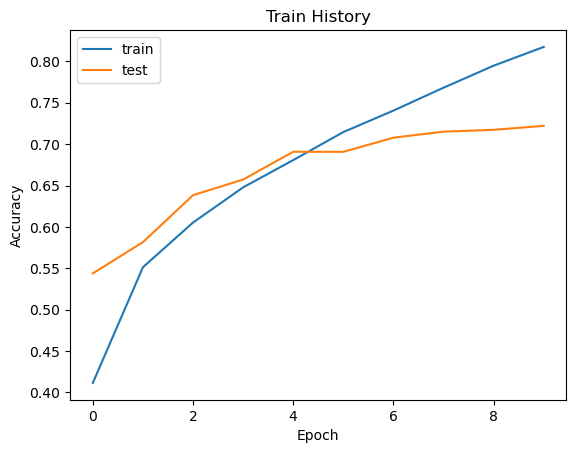

In [21]:
#畫出accuracy執行結果
show_train_history('accuracy','val_accuracy')

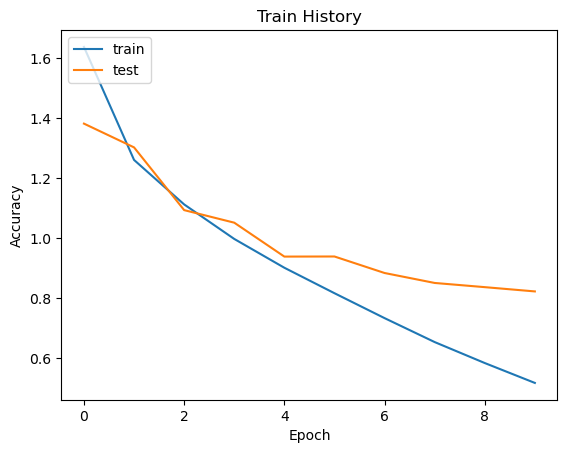

In [22]:
#畫出loss誤差執行結果
show_train_history('loss','val_loss')

In [24]:
#評估模型準確率
scores = model.evaluate(x_img_test_normalize , y_label_test_OneHot,verbose=0)
scores[1]

0.7263000011444092

In [25]:
#進行預測
prediction=model.predict(x_img_test_normalize)
classes_x=np.argmax(prediction,axis=1)

313/313 [==============================] - 3s 8ms/step


In [26]:
classes_x[:10]

array([5, 8, 8, 8, 6, 6, 1, 6, 3, 1], dtype=int64)

In [31]:
#定義label_dict字典
label_dict ={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [32]:
#修改plot_images_labels_prediction
#使用label_dict字典，將label與prediction的0~9數字轉換維圖形的類別名稱。
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #數字影像,真實質,預測結果,開始的顯示資料index,要顯示的資料數
    fig = plt.gcf()            #圖形大小
    fig.set_size_inches(12,14) #圖形大小
    if num > 25 : num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)#建立subgraph子圖形5行5列
        ax.imshow(images[idx],cmap='binary')#劃出subgraph子圖形
       
        title = str(i)+','+label_dict[labels[i][0]]
        if len(prediction) > 0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10)   #設定title大小
        ax.set_xticks([]);ax.set_yticks([]) #設定不顯示刻度
        idx+=1
    plt.show()

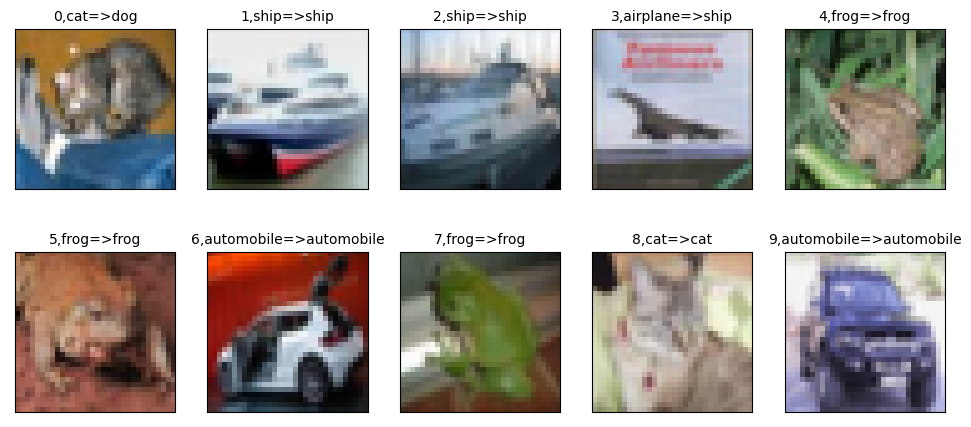

In [33]:
#顯示前10筆資料
plot_images_labels_prediction(x_img_test,y_label_test,classes_x,0,10)

In [34]:
#使用測試資料進行預測
Predicted_Probability = model.predict(x_img_test_normalize)

313/313 [==============================] - 2s 8ms/step


In [35]:
#建立show_Predicted_Probability函數
def show_Predicted_Probability(y,classes_x,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],'predict',label_dict[classes_x[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))
        

定義show_Predicted_Probability()。
傳入    y:真實值 classes_x:預測結果 x_img:預測影像  Predicted_Probability:預測機率 
        i:開始顯示的資料index
- - - - - - - - 
#設定影像大小
plt.figure(figsize=(2,2)) 
plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
plt.show()
- - - - - - - -
#讀取Predicted_Probability預測機率
for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict dog


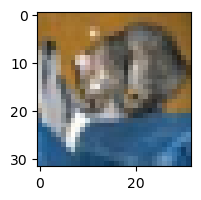

airplane Probability:0.003243021
automobile Probability:0.004841774
bird Probability:0.004251102
cat Probability:0.427171052
deer Probability:0.021135818
dog Probability:0.439188540
frog Probability:0.026039938
horse Probability:0.017801365
ship Probability:0.047608595
truck Probability:0.008718898


In [36]:
#查看第0筆資料的預測機率
show_Predicted_Probability(y_label_test,classes_x,x_img_test,Predicted_Probability,0)

label: airplane predict ship


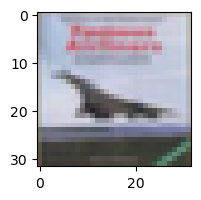

airplane Probability:0.369266868
automobile Probability:0.017008558
bird Probability:0.021227380
cat Probability:0.001521078
deer Probability:0.008175433
dog Probability:0.000096350
frog Probability:0.000223245
horse Probability:0.000473160
ship Probability:0.580813229
truck Probability:0.001194638


In [37]:
#查看第3筆資料的預測機率
show_Predicted_Probability(y_label_test,classes_x,x_img_test,Predicted_Probability,3)

In [38]:
#查看classes_x(prediction)預測的結果狀況
classes_x.shape

(10000,)

In [39]:
#查看y_label_test真實值的shape形狀
y_label_test.shape

(10000, 1)

In [41]:
#將y_label_test真實值，轉換為1維陣列 使用reshape(-1)
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [42]:
#建立混淆矩陣
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),classes_x,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,692,12,35,27,29,10,18,12,132,33
1,12,791,6,19,3,6,10,6,65,82
2,44,3,517,84,124,84,88,32,18,6
3,14,5,27,579,65,172,84,23,14,17
4,10,1,28,92,731,28,55,41,13,1
5,8,1,13,191,57,633,56,26,10,5
6,3,1,15,62,29,12,863,6,8,1
7,9,2,15,45,59,69,13,772,5,11
8,23,22,8,12,6,6,7,0,903,13
